In [2]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

# Model Complexity and Overfitting

**Overview**
In this exercise you will experiment with the impact of model complexity (higher order polynomial) and how it relates to Occam's Razor. 


<article class="message">
    <div class="message-body">
        <strong>List of tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#poly_re">Task 1:  Polynomial regression</a>
            </li>
            <li>
            <a href="#occam_train">Task 2: Train and evaluate linear models with po…</a>
            </li>
            <li>
            <a href="#plot_results">Task 3: Plot the polynomials (models)</a>
            </li>
            <li>
            <a href="#reflection">Task 4: Reflection</a>
            </li>
            <li>
            <a href="#Different_data_func">Task 5: Changing the data generating function</a>
            </li>
        </ul>
    </div>
</article>

<div style="float: right; width: 50%; justify-content: start" class="block is-clearfix">

<div class="has-text-centered">
<figure class="image is-inline-block" >

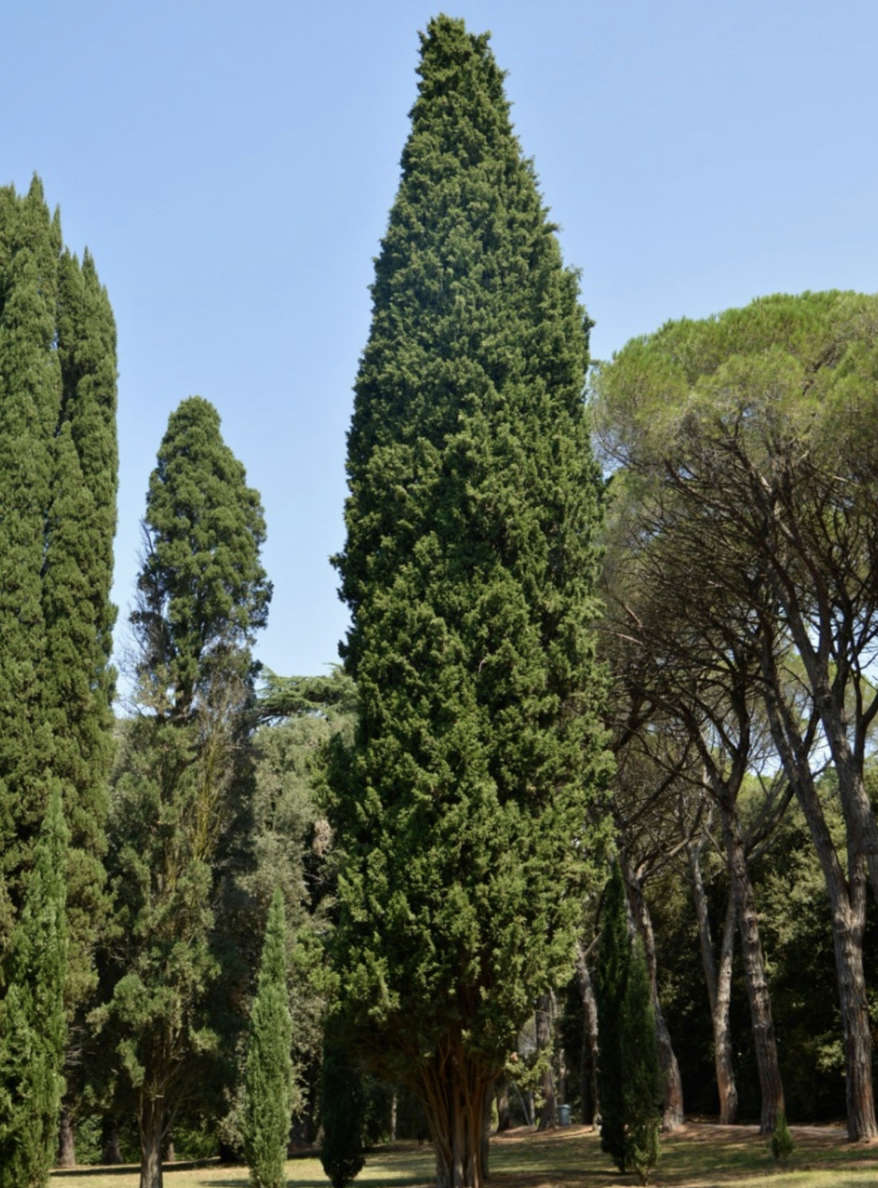


</figure>
</div>


</div>

This exercise is about making a regression model to predict the growth of Thuja Green Giant trees. You have to help the scientists decide which polynomial order best represents the training data to estimate future growth. To determine the optimal fit (model parameters), another group of researchers have provided you with  observation of height of their Thuja Green Giant trees from years later than currently observed by your team (`X_test`
 and `y_test`
). You will use this to choose the optimal model representing the growth of the Thuja Green Giant.
## Data
The following cell constructs and shows the data for the exercise. The data simulates growth (in meters) of one of the fastest growing trees, the Thuja Green Giant, each year. Scientists have observed and reported the growth of the tree for 7 years (`X_train`
 and `y_train`
), and now want to predict the future growth. 
The objective is to assist in making predictions based on this data. Additional data from another group has been provided to validate the hypothesis.
The scientists assume a polynomial relationship. 


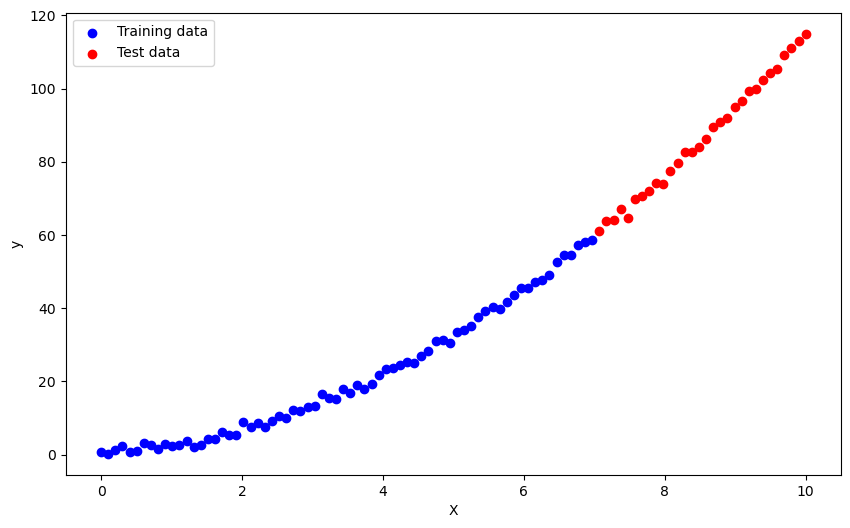

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 100
X = np.linspace(0, 10, n_samples).reshape(-1, 1)
#y_true = 1.5 * X.ravel() + 0.2
y_true = X.ravel()**2 + 1.5 * X.ravel() + 0.2
noise = np.random.normal(0, 1, n_samples)
y = y_true + noise

# Split the data into training and test sets
split_index = int(0.7 * n_samples)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()


---
**Task 1 (easy):  Polynomial regression👩‍💻**
1. In this exercise you may reuse polynomial regression using least squares
 from the previous exercise, or use the `PolynomialFeatures()`
 method from the [scikit-learn library](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
 to implement the `polynomial_regression()`
 method in the cell below. 


---

In [49]:
def get_design_matrix(x, order=1):
    return PolynomialFeatures(order).fit_transform(x)

def predict(x, model, degree):
    design = get_design_matrix(x, degree)
    return design@model

def polynomial_regression(X, x_test, y, degree):
    """
    Create and train a model of desired order and use it to predict the growth of the trees.

    :param X: Vector of combined observed years).
    :param y: Vector of combined observed height.
    :param degree: Degree of the model.
    
    :return: Vector containing prediction for training data, vector containing prediction for test data.
    """
    design = get_design_matrix(X, degree)
    weights, _, _, _ = np.linalg.lstsq(design, y)
    train_pred = predict(X, weights, degree)
    test_pred = predict(x_test, weights, degree)
    return train_pred, test_pred
#write code/solution here ...

#polynomial_regression(X_train, X_test, y_train, 1)


---
**Task 2 (easy): Train and evaluate linear models with polynomial features👩‍💻**
1. Use the function `polynomial_regression`
 to perform polynomial regression for each order defined in the `degrees`
 variable and predict the outcome for both the test and training data. 
2. Implement the function `compute_mse`
 that based on the predictions of a model and the ground truth targets returns the _mean-squared-error_.


$$ MSE = \frac{1}{m}\sum_{i=1}^{m}(f_{\mathbf{w}}(x_{i})-y_{i})^2$$

**Hint**
You may save some time by modifying the implementation of the `rmse`
 function from the previous exercise.

3. For each polynomial model calculate the _mean-squared-error_ for both the training and test data (use `polynomial_regression`
 and `compute_mse`
).


---

In [50]:
def compute_mse(y_true, y_pred):
    """Compute Mean Squared Error between true and predicted values."""
    return np.mean((y_pred-y_true)**2)

# Train and evaluate linear models with different polynomial features

degrees = [1, 2, 3, 4, 5, 6]
train_pred = []
test_pred = []
train_error = []
test_error = []

for degree in degrees:
    tr,ts = polynomial_regression(X_train, X_test, y_train, degree)
    train_pred.append(tr)
    test_pred.append(ts)
    train_error.append(compute_mse(y_train, tr))
    test_error.append(compute_mse(y_test, ts))


#write code/solution here ...


---
**Task 3 (easy): Plot the polynomials (models)👩‍💻**
Run the cell below to:
1. Plot the data so that training and test data have different colors.
2. Plot the predictions of the polynomial models over the scatter plot showing the given data. Perform this for both the training and test sets using X as input.


---

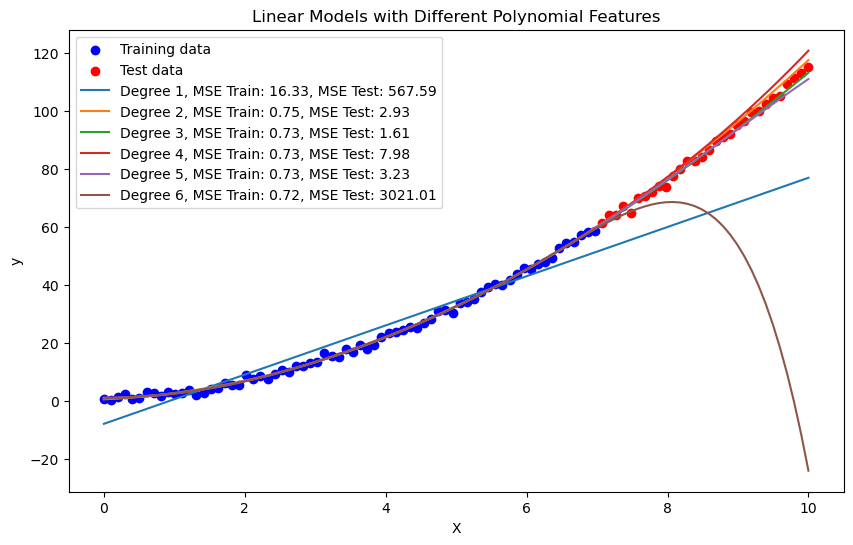

(0.0, 26.33402574515326)

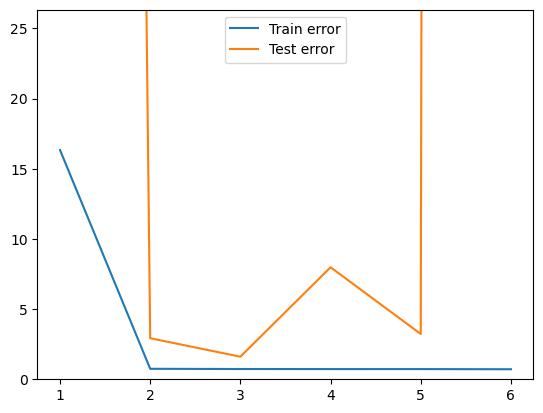

In [54]:
# Plot the results

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')

for i, degree in enumerate(degrees):
    plt.plot(X, np.concatenate((train_pred[i],test_pred[i])), label=f'Degree {degree}, MSE Train: {train_error[i]:.2f}, MSE Test: {test_error[i]:.2f}')
plt.xlabel('X')
plt.ylabel('y')
#plt.ylim(0,22)
plt.legend()
plt.title('Linear Models with Different Polynomial Features')
plt.show()

plt.plot(degrees, train_error, label="Train error")
plt.plot(degrees, test_error, label="Test error")
plt.legend()
plt.ylim(0, max(train_error)+10)
# Insert code for question 1
# The following line keep axis fixed in a plot
#plt.ylim(0,30)
#plt.figure(figsize=(10, 6))
#plt.scatter(X_train, y_train, color='blue', label='Training data')
#plt.scatter(X_test, y_test, color='red', label='Test data')
#for i, degree in enumerate(degrees):
#    plt.scatter(X_test, test_pred[i], label=f'Predicted using degree {degree}')
#
#plt.legend()
#plt.show()

# Insert code for question 2


---
**Task 4 (medium): Reflection💡**
Reflect on:
1. Which model had the best performance  on the training data?
2. Which model had the best performance  on the test data?
3. How does the complexity (degree) of the model affect the performance on the training and test data?
4. Which model(s) shows signs of overfitting? How can you tell?


---

1. 6th degree poly
2. first degree poly
3. The bigger the model complexity the worse the generalization
4. All models but the first since the MSE for the training and test data diverges considerably.


---
**Task 5 (medium): Changing the data generating function👩‍💻💡**
How do the results change if the underlying function generating the data was changed to a 2. order polynomial, so that it e.g. simulates bacteria growth instead? 
1. Re-generate the data by replacing `y_true`
 with $y=f(x)=x^2+1.5x-3$ in the data generation step, and rerun the other code blocks.
2. Does it still make sense to follow the strategy of Occam's razor?


---

In [8]:
# Write reflection